In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
experiment_results = pd.read_csv('experiment_results.csv')

In [6]:
experiment_results.head()

,Dataset,Accuracy_SMEML,Accuracy_Dumb,Time_to_Train_SMEML (sec),Time_to_Train_Dumb (sec),Size (RxC)
0,Lung Cancer Prediction,0.9839,0.9839,143.07,317.04,309x16
1,Chronic Kidney Disease Dataset,1.0000,1.0000,419.64,788.46,400x26
2,Pima Indians Diabetes Dataset,0.7857,0.8052,161.99,374.01,768x8
3,Brain Stroke Prediction Dataset,0.9458,0.9458,114.16,370.95,4892x11
4,Stroke Prediction Dataset,0.9393,0.9393,172.67,385.23,5110x12


In [20]:
experiment_results['multiplied_size'] = [(int(row['Size (RxC)'].split('x')[0]) * int(row['Size (RxC)'].split('x')[1])) for _, row in experiment_results.iterrows()]

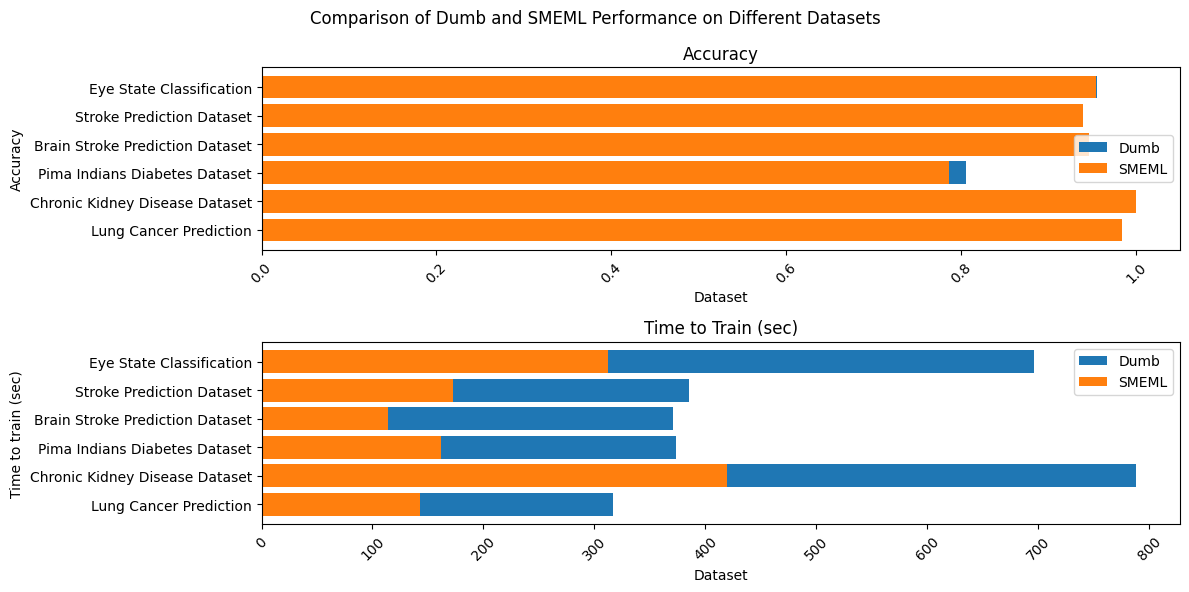

In [40]:
# each dataset is a different bar group
# graph Accuracy_SMEML and Accuracy_Dumb
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)

plt.barh(experiment_results['Dataset'], experiment_results['Accuracy_Dumb'], label='Dumb')
plt.barh(experiment_results['Dataset'], experiment_results['Accuracy_SMEML'], label='SMEML')
plt.legend()

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.xticks(rotation=45)

# graph Time_to_train_SMEML (sec) and Time_to_train_Dumb (sec)

plt.subplot(2, 1, 2)

plt.barh(experiment_results['Dataset'], experiment_results['Time_to_Train_Dumb (sec)'], label='Dumb')
plt.barh(experiment_results['Dataset'], experiment_results['Time_to_Train_SMEML (sec)'], label='SMEML')

plt.legend()
plt.xlabel('Dataset')
plt.ylabel('Time to train (sec)')
plt.title('Time to Train (sec)')
plt.suptitle('Comparison of Dumb and SMEML Performance on Different Datasets')

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('experiment_results.png')
plt.show()